# Efficient Approximation of Pricing Functions
### Academic Supervisors: 
Abdul-Lateef Haji-Ali (HW, Mathematics), Aretha Teckentrup (UoE, Mathematics)
### Team members:
Jonny Spence, Martin Brolly, Gong Xue
#### Abstract: 
State-of-art best-practice pricing models in modern mathematical finance lack closed
form analytical solutions. Therefore, numerical methods – e.g. Monte Carlo, tree pricing, Fourier
(COS) pricing – are used to approximate their solutions. As the calibration of such models and
their application in risk management, asset and liability management, and portfolio optimization
typically require speedy generation of a large number of price scenarios, the trade-off struck by
practitioners between pricing accuracy and runtime favours fast numerics over precision. In
such situations, an approximate pricing function that is capable of quickly interpolating a price
with target accuracy from a training data generated offline can be an appropriate solution to
the modelling problem. The goal of this project is to test various interpolation methods on a
concrete problem.
* This project is in collaboration with Moody’s (https://www.moodys.com).

## 1. Overview
The target of this project is to test various methods to generate training data which help improve training speed. We will start by testing three methods: (i) multi-level Monte Carlo, (ii)least square approximation and (iii) guassian process. 

### 1.1 Black-Karasinski model
The model we are going to test on Black-Karasinski (BK) model. "Black and Karasinski (BK) develop a model, within a discrete timeframework, where the target rate, mean reversion rate and local volatility are deterministic functions of time. The specification of three time-dependent factors allows the future short-term interest rate volatilities to be specified independently of the initial volatility term structure... the short-term interest rate is assumed to have a lognormal distribution at any time horizon. The standard assumptions underlying perfect markets are also made."

The BK model may be written as: 
\begin{equation*}
\text{d}(\text{ln} r) = \alpha(\text{ln}\mu(t)-\text{ln} r)\text{d}t+\sigma \text{d}w
\end{equation*}

where
* $r$ is the short-term interest rate
* $\alpha$ is the speed of the mean reversion
* $\mu(t)$ is the target interest rate, i.e. the reversion level
* $\sigma$ the local volatility, i.e. the volatility of the short-term interest rate
* $dW$ ~ $N(0,1)$

The price function is given by 
\begin{equation*}
P(\alpha, T) = E[exp(-\int_{o}^{T} r(t) dt)]
\end{equation*}

### 1.2 Multi-level Monte-Carlo
Monte-Carlo is an method to estimate an expected value arising from a stochastic differential equation (SDE) through random sampling. multi-level Monte Carlo is a methode to reduce the computational complexity of Monte Carlo simulation using a geometric sequence of timesteps.




## 2. Simulation

### 2.1 Monte Carlo
Firstly we are going to use Monte Carlo method to generate training data to estimate $P(t)$. Parameters are $\alpha, \sigma, \mu$ and $T$. For each parameter, we will use 10 grids. 

In [2]:

%matplotlib notebook


# import library
import numpy as np
from random import seed
from numpy.random import randn
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# set the state of randn
seed(1)
# preallocate arrays


# initialize variables alpha, sigma, T
dt = 0.1
itr = 10000 #number of iteration
alphaArray = np.arange(0.1, 1.1, 0.1)
sigmaArray = np.arange(0.1, 1.1, 0.1)
TArray = np.arange(0.1, 1.1, 0.1)

EP_Matrix = np.zeros((10,10,10))
Error_Matrix = np.zeros((10,10,10))
#for each alpha value
for a in range(10):
    alpha = alphaArray[a]
#for each sigma value
    for s in range(10):
        sigma = sigmaArray[s]
        lnr = np.zeros(itr)      
        integral = 0
#for each time
#simulate the SDE
        for i in range(10):
            dw = math.sqrt(dt)*randn(itr)
            time = dt*(i+1)
            mu = math.sin(time)
            lnmu = math.log(mu)
            dlnr = alpha*(lnmu - lnr)*dt + sigma*dw
            lnr += dlnr #updae lnr
            r = np.exp(lnr)
            integral += r*dt #calculate interval integral of r
        #total integral
            Pt = np.exp(-integral)
            EP = np.mean(Pt)
            Error = np.std(Pt)/math.sqrt(itr)
            EP_Matrix[a,s,i] = EP
            Error_Matrix[a,s,i] = Error
#take average of P as an estimation of the expectation





<IPython.core.display.Javascript object>


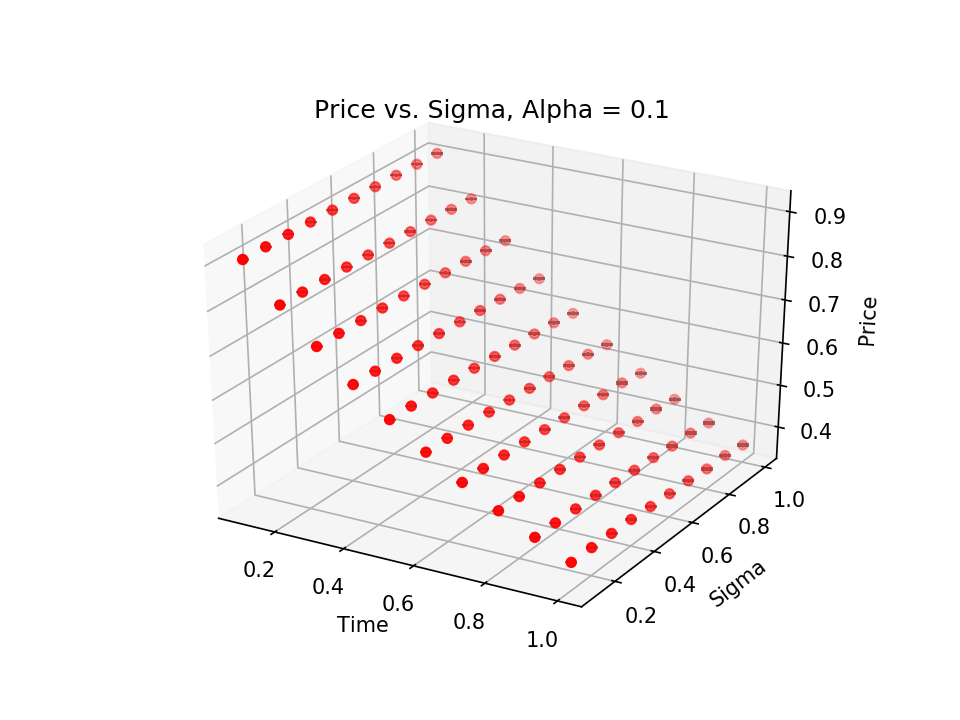

<IPython.core.display.Javascript object>


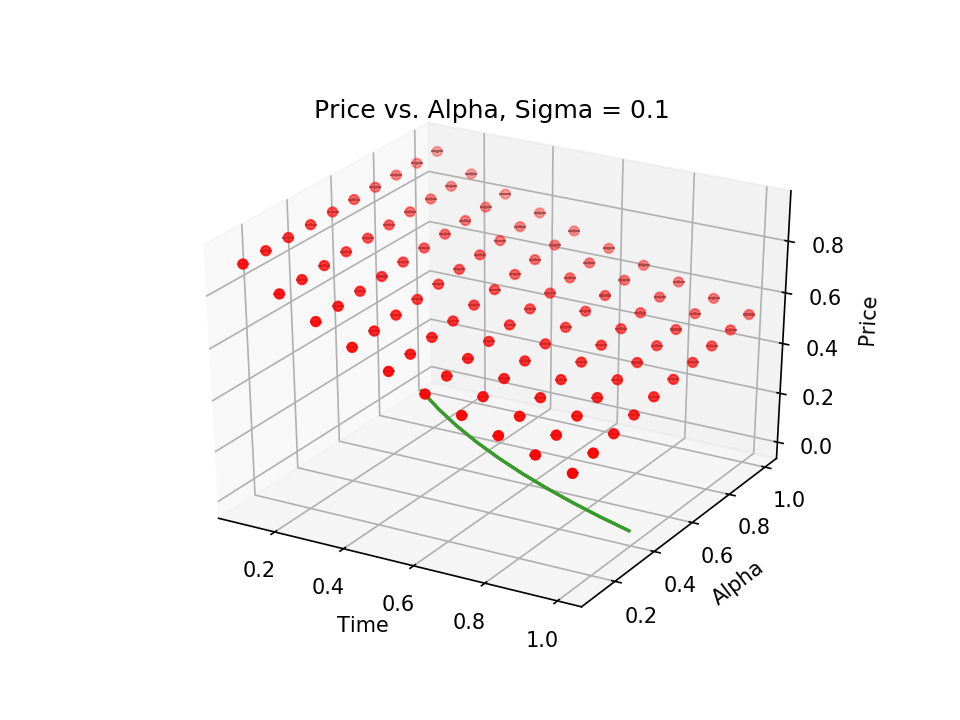

In [3]:
##plot it out on 3-d plots
            
##plot P, t, sigma
alphaID = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.tile(TArray,10) #t
y = np.repeat(sigmaArray,10) #sigma
z = EP_Matrix[alphaID].flatten() #P

zerror = Error_Matrix[alphaID].flatten() 


ax.scatter(x,y,z, c='r', marker='o')

ax.set_xlabel('Time')
ax.set_ylabel('Sigma')
ax.set_zlabel('Price')
ax.set_title('Price vs. Sigma, Alpha = ' + str(alphaArray[alphaID]))

#plot errorbars
for i in np.arange(0, len(z)):
   ax.plot([x[i], x[i]], [y[i], y[i]], [z[i]+zerror[i], z[i]-zerror[i]], c='grey', marker="_")


plt.show()




            
##plot P, t, alpha
sigmaID = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.tile(TArray,10) #t
y = np.repeat(alphaArray,10) #alpha
z = EP_Matrix[:,sigmaID].flatten() #P

zerror = Error_Matrix[:,sigmaID].flatten() 


ax.scatter(x,y,z, c='r', marker='o')

ax.set_xlabel('Time')
ax.set_ylabel('Alpha')
ax.set_zlabel('Price')
ax.set_title('Price vs. Alpha, Sigma = ' + str(sigmaArray[sigmaID]))

#plot errorbars
for i in np.arange(0, len(z)):
   ax.plot([x[i], x[i]], [y[i], y[i]], [z[i]+zerror[i], z[i]-zerror[i]], c='grey', marker="_")


plt.show()


In [10]:
#interactive 2d plot
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np

def interactivePlot(alpha, sigma):

    alphID = int(alpha/0.1)-1
    sigmaID = int(sigma/0.1)-1
    TArray = np.arange(0.1, 1.1, 0.1).flatten()
    time = TArray
    price = EP_Matrix[alphaID,sigmaID].flatten()
    zerror = Error_Matrix[alphaID,sigmaID] 
    print(price)
    plt.figure() 
    plt.plot(time, price)
    plt.show()

interact(interactivePlot,alpha=np.arange(0.1, 1.1, 0.1),sigma=np.arange(0.1, 1.1, 0.1))
    

interactive(children=(Dropdown(description='alpha', options=(0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7…

<function __main__.interactivePlot(alpha, sigma)>

To to list
* Calculate full error of Monte Carlo
    - Sample error
    - Discretization error
* Use geometric brownian motion to compare the error with the theoretical value

### 2.2 Monte Carlo simulation of geometric Brownian motion

We will simulate a geometric brownian motion using Monte Carlo. Since the geometric brownian motion is exactly soluble, we could estimate the error for Monte Carlo method and compare it with exact value.

#### 2.2.1 Geometric brownian motion
If a random variable $S_t$ follows geometric brownian motion, the logrithm of the variable follow brownian motion:

\begin{equation*}
dS_t = \mu S_t dt + \sigma S_t dW_t
\end{equation*}
where $W_t$ is a Wiener process with properties $W_{t+u}-W_t \sim N(0,u)$
or $W_{t+u}-W_t \sim \sqrt{u}N(0,1)$

The analytical solution is given by 
\begin{equation*}
S_t = S_0 exp((\mu-\frac{\sigma^2}{2})t+\sigma W_t)
\end{equation*}
and 
\begin{equation*}
E[S_t] = S_0 e^{\mu t}
\end{equation*}
\begin{equation*}
Var[S_t] = S_0^2 e^{2\mu t}(e^{\sigma^2 t}-1)
\end{equation*}

In this exercise, we take $S_0 = 1$, $\mu =  0.05$, and $\sigma = 0.2$
#### 2.2.2 Error estimation for Monte Carlo
The expected value and variance of a Monte-Carlo estimator for function $f$ using step size $h$ and $N$ independent paths is given by
\begin{equation*}
E[\hat{E}_{h,N}^{MC}]=E[f_h]
\end{equation*}
\begin{equation*}
V[\hat{E}_{h,N}^{MC}]=\frac{V[f_h]}{N}
\end{equation*}
where $f_h$ is the numerical approximation of function $f$ using time step $h$.

The accuracy of the Monte Carlo method is measured by the Mean Square Error (MSE) defined as
\begin{equation*}
\text{MSE} = e[\hat{E}_{h,N}^{MC}]^2=E[(\hat{E}_{h,N}^{MC}-  E[f])^2]=\frac{V[f_h]}{N} + (E[f_h-f])^2     (1)
\end{equation*}
where $f$ is the exact value of the function.
The first component of the MES is the sampling error due to finite sample. This could be calculated numerically by taking the variance of $N$ independent paths and devide by $N$. 

The second component is the numerical error due to the discretization using step size $h$. We need to know the exact solution to calculate the exact value of numerical error. However, we could also approximate it by using different stepsize. If we have local truncation error (LTE) of the numerical method = $O(h^p)$ for some $p>=1$, then 

\begin{equation*}
|{f-f_h}|\sim \frac{2^p}{2^p - 1}|f_h-f_{h/2}|   (2)
\end{equation*}
In the excersize we use Euler method which has p=1

#### 2.2.2 Numeric algorithm

We will use the following steps:
* Simulate the random variable $S$ that follows geometric browning motion using Monte Carlo
* For each independent path from 0 to 1, simulate the path using step size $h$
* Calculate $f_h$, $f$, and |$f_h - f$| at time 1
* Simulate the path using step size $h/2$, and calculate $f_{h/2}$ and $|f_h - f_{h/2}|$ at time 1
* After simulation of $N$ independent paths, calculate the exact MSE and oppoximation of MSE using equation $(1)$ and $(2)$

<IPython.core.display.Javascript object>


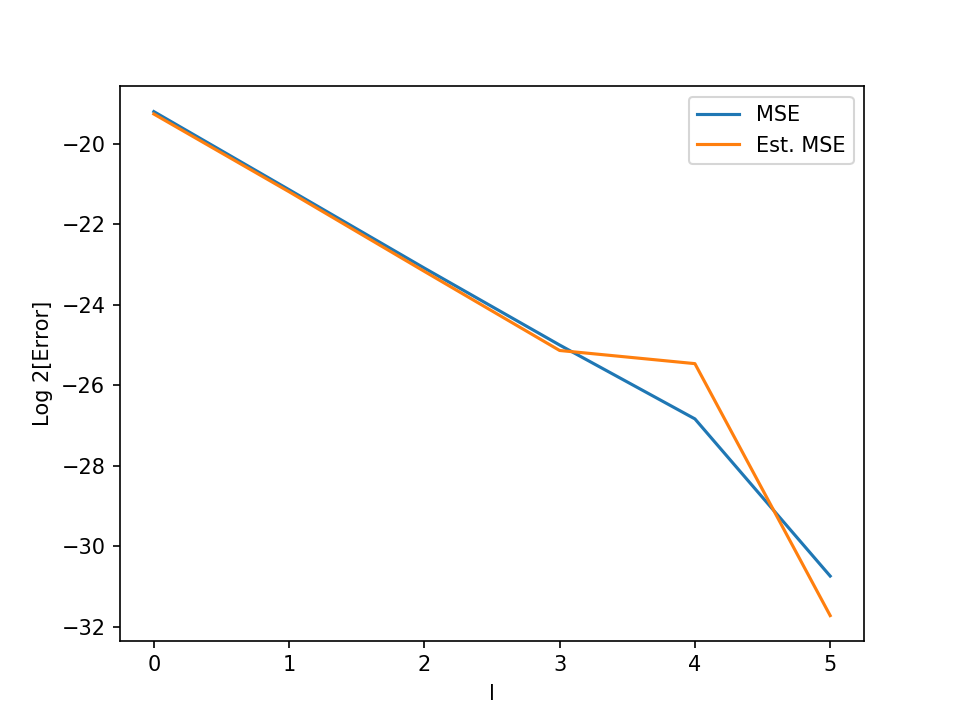

[1.59424506e-06 4.18020292e-07 1.06067280e-07 2.71640940e-08
 2.16573498e-08 2.82614201e-10] [1.66180208e-06 4.32889175e-07 1.12209868e-07 2.98370785e-08
 8.36352825e-09 5.58298463e-10]


In [15]:

%matplotlib notebook

# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

# import library
import numpy as np
from random import seed
from numpy.random import randn
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pylab 
# set the state of randn
seed(1)
# preallocate arrays


# initialize variables alpha, sigma, T
s0=1
mu=  0.05
sigma = 0.005
M = 2
N = 100000 #number of independent paths
T=1 #end time
TArray = np.arange(0.1, 1.1, 0.1)

L = 6
Larray = np.arange(L)
Esh = np.zeros(L+1)
Vsh = np.zeros(L+1)
Es = np.zeros(L+1)
Vs = np.zeros(L+1)
EdeltaS = np.zeros(L)
EdeltaSh = np.zeros(L)
MSE = np.zeros(L)
MSEh = np.zeros(L)
st = np.zeros(64)
#for each l
for l in range(L+1):
#simulate the SDE
    sh = np.ones(N)*s0 #sh is the numerical approximation of s
    nstep = np.power(M,l)
    h = T/np.power(M, l)
    for i in range(nstep):
        dw = math.sqrt(h)*randn(N)
        dsh = mu*sh*h + sigma*sh*dw
        sh += dsh #updae s
        st[i]=sh[0]
    #calculate mean and variance of sh    
    Esh[l] = np.mean(sh)
    Vsh[l] = np.var(sh)
    

#calculate mean square error of Monte- Carlo
Es = s0*np.exp(mu*T)
Vs = s0**2*np.exp(2*mu*T)*(np.exp(sigma**2*T)-1)
   
#calculate mean of s - s/2
EdeltaSh = np.abs(Esh[0:L] - Esh[1:(L+1)])
EdeltaS = np.abs(Esh[0:L] - Esh[1:(L+1)])

#calculate the exact value of expectation and variance of s at 1
MSE = (Vsh/N+np.power((Esh-Es),2))[0:L]
MSEh = Vsh[0:L]/N+np.power(2*EdeltaSh,2)
line = [1e-7/np.power(2,l) for l in Larray]

logMSE = [math.log(y, 2) for y in MSE]
logMSEh = [math.log(y, 2) for y in MSEh]
logline = [math.log(y, 2) for y in line]
## evolution of the opinion over time
line1 = pylab.plot(Larray, logMSE, label = 'MSE')
line2 = pylab.plot(Larray, logMSEh, label = 'Est. MSE')
#line3 = pylab.plot(Larray, logline, label = 'Est. MSE')

pylab.legend(loc='upper right')
pylab.ylabel('Log 2[Error]')

pylab.xlabel('l')

pylab.show()
#plt.plot(st)
print(MSEh,MSE)


## 6. References

[[1]](https://link.springer.com/chapter/10.1057/9781403946027_9) Svoboda S. (2004) The Black and Karasinski Model. In: Interest Rate Modelling. Finance and Capital Markets Series. Palgrave Macmillan, London]

In [9]:
print([np.power(2,l) for l in Larray])

[1, 2, 4, 8, 16, 32]
